In [2]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk6 import rk_defect_control_perfect_first_step

In [3]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [4]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha(model, t_span, y0[0], tol, solution)
    # print("derivs", derivs)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()
    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999997, 0.5000000000000003, 1.0000000000000007]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 2.0000000000000013, 1.999999999999999, 1.0]
n_steps 20
n_successful_steps 16


Monitor10
alpha values [0.9999999999999989, 1.9999999999999984, 2.0000000000000004, 2.0, 1.0000000000000007, 2.0000000000000013, 1.9999999999999978, 2.000000000000002, 2.0000000000000036]
beta values [1.9999999999999978, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 4.000000000000003, 4.000000000000007, 2.000000000000002]
n_steps 0
n_successful_steps 0

integration complete


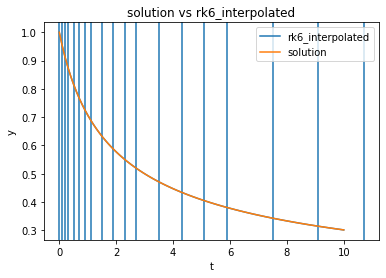

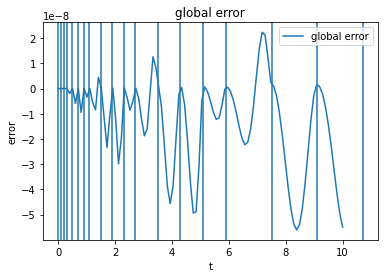

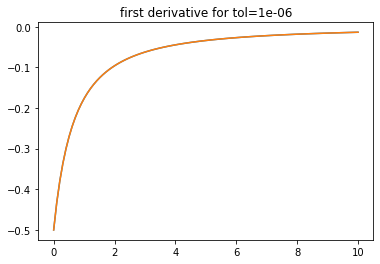

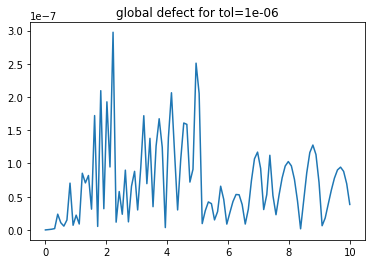

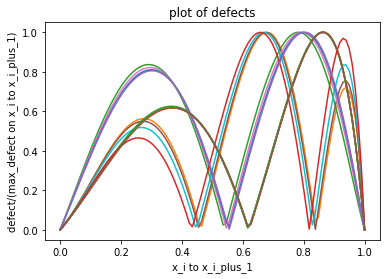

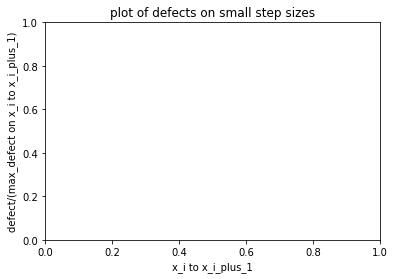

0.0
0.0
0.0
3.695932448977146e-13
8.518763472409319e-11
9.313949611566841e-11
8.585832045326924e-11
7.631018039688797e-11
4.813625054111981e-10
4.714355572588147e-10
4.102393980076613e-10
3.520835845094439e-10
1.2005506588863568e-09
1.0989005261308193e-09
9.25563403697538e-10
7.790403322438522e-10
1.8108499144631196e-09
1.587871500952076e-09
1.3128326759037634e-09


In [5]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 2.0, 0.4999999999999997, 0.5000000000000003, 1.999999999999999, 0.5000000000000006, 0.5, 1.9999999999999978]
beta values [0.5, 1.0000000000000002, 2.0000000000000013, 1.999999999999999, 1.0, 0.9999999999999994, 0.5000000000000002, 1.9999999999999978, 2.0, 0.5000000000000006]
n_steps 28
n_successful_steps 23


Monitor10
alpha values [0.9999999999999989, 1.9999999999999984, 2.0000000000000004, 1.9999999999999978, 4.000000000000004, 1.0000000000000007, 2.000000000000002, 3.999999999999998, 2.0, 1.0000000000000022, 1.0, 3.9999999999999956]
beta values [1.0, 2.0, 2.0000000000000013, 3.9999999999999956, 2.000000000000002, 1.9999999999999978, 4.000000000000007, 1.000000000000001, 4.000000000000003]
n_steps 0
n_successful_steps 0

integration complete


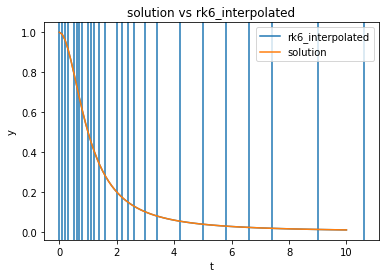

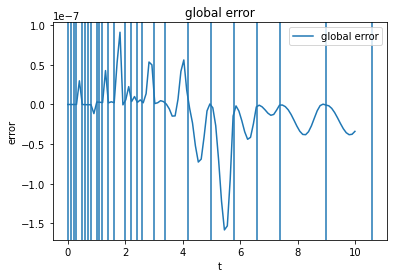

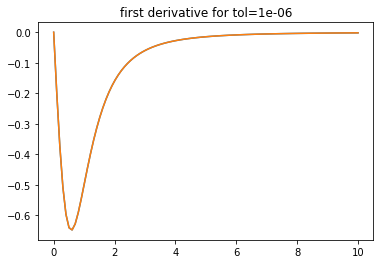

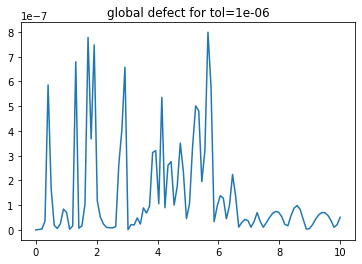

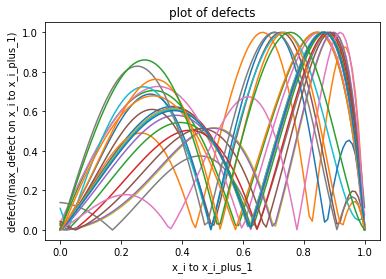

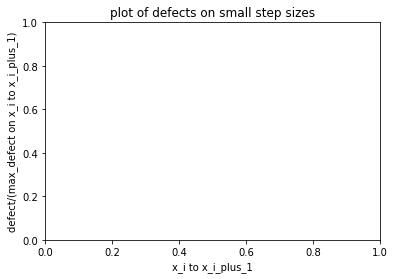

0.0
0.0
0.0
2.5861424113315934e-11
3.8207015329305705e-10
3.0070534950965566e-10
2.2672186350547463e-10
1.670644733664517e-10
3.527255043600519e-09
2.894373019035612e-09
2.3776653979012963e-09
2.0223220875692505e-09
1.5047985635341377e-09
4.832104216756505e-09
3.5433126988060337e-09
2.644841873289394e-09
2.007216087784869e-09
1.1896181123516314e-09
7.564911475022029e-10
2.8647069300058448e-09
1.587023901183926e-09
8.526789309348803e-10
4.945995245309032e-10
3.080827849777368e-10
7.059377978013703e-10
3.459227956165156e-10


In [6]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000003, 0.5000000000000001, 1.0000000000000002]
beta values [0.9999999999999998, 1.9999999999999998, 1.0000000000000002, 2.0000000000000004, 1.999999999999999, 1.0, 0.5000000000000006]
n_steps 13
n_successful_steps 10


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 0.9999999999999998, 1.0000000000000007, 0.9999999999999999, 2.0, 1.9999999999999978]
beta values [1.9999999999999996, 2.0000000000000013, 3.9999999999999996, 3.9999999999999956, 4.000000000000001, 3.999999999999999, 3.9999999999999982, 4.000000000000003, 2.0, 1.9999999999999978, 1.0]
n_steps 0
n_successful_steps 0

integration complete


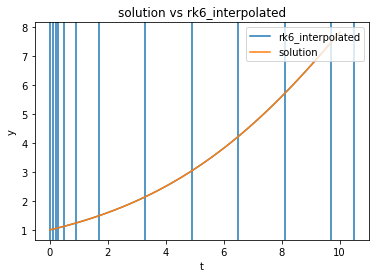

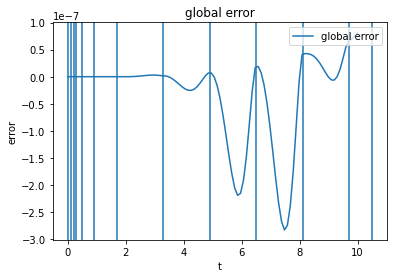

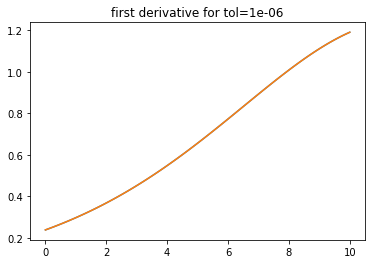

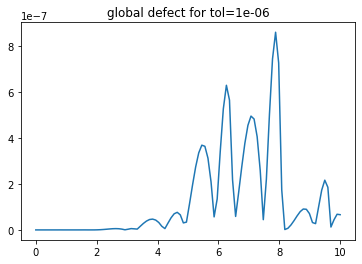

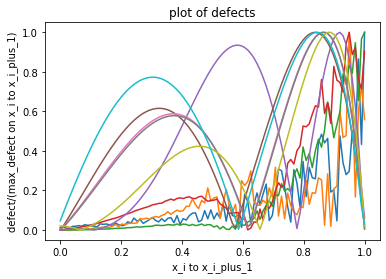

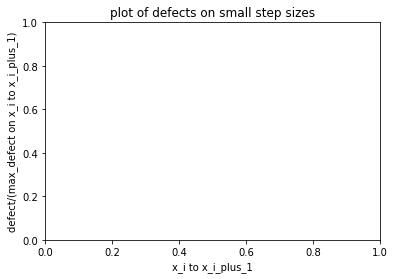

0.0
0.0
0.0
2.220446049250313e-15
5.773159728050814e-15
4.596323321948148e-14
3.255173908200959e-13
1.715175557137627e-09
7.656999034821865e-09
2.0830936975357872e-08
4.2363356378416483e-08
6.67786270724946e-08
6.963322185526977e-08


In [7]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
Monitor8
alpha values [64.00000000000023, 1.0, 0.5000000000000089, 1.9999999999999645, 0.5, 0.4999999999999978, 2.0, 1.0000000000000044, 2.000000000000009, 0.9999999999999822, 2.000000000000142, 1.9999999999994316, 0.5000000000001421, 1.000000000000071, 2.0000000000022737, 0.49999999999943157, 0.4999999999999645]
beta values [0.4999999999999999, 1.0000000000000002, 0.06250000000000006, 0.24999999999999994, 0.1250000000000001, 0.03124999999999989, 0.015624999999999944, 1.0, 0.5000000000000089, 1.9999999999999645, 2.0, 2.000000000000009, 0.5, 1.0000000000000178, 2.000000000000142, 2.0000000000000178, 2.0000000000022737, 1.9999999999994316, 0.4999999999999645, 0.9999999999999956, 0.5000000000001421, 0.4999999999999978, 0.999999999999929, 0.49999999999943157, 1.999999999999929]
n_steps 2838
n_successful_steps 1912


Monitor10
alpha values [128.00000000000273, 1.0, 2.0, 2.0000000000000004, 3.999999999999929, 0.9999999999999911, 4.000000000000018, 1.9999999999999911, 2.00000

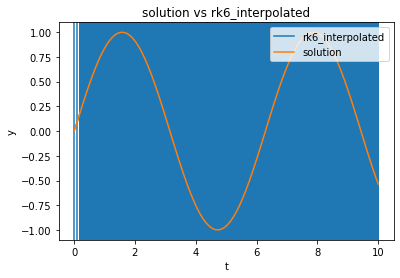

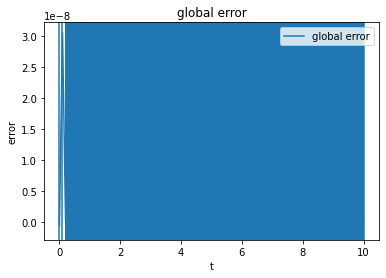

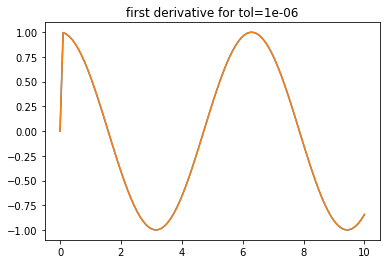

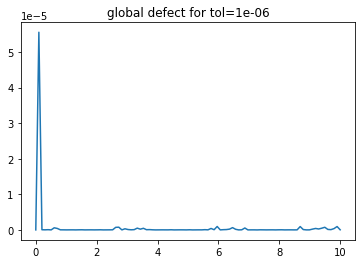

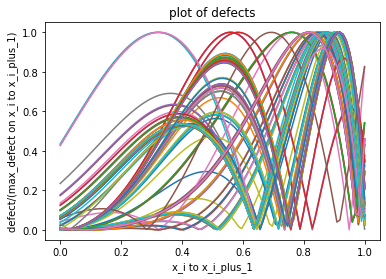

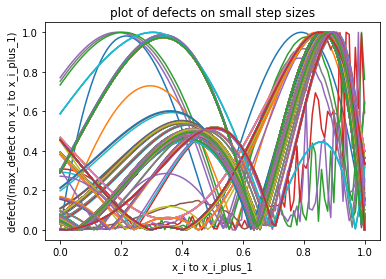

0.0
0.0
0.0
1.3600232051658168e-15
1.5543122344752192e-15
1.887379141862766e-15
2.0816681711721685e-15
3.885780586188048e-15
3.2389091408902004e-12
8.539909057692086e-10
4.606428571918286e-10
2.502084373023905e-10
1.3767559314814548e-10
7.75260133867306e-11
4.5405873505544037e-11
1.0458116594946887e-09
5.640076738977484e-10
3.0623109603666876e-10
1.6834800220522084e-10
9.464956596261231e-11
5.531453073359671e-11
3.436029238912397e-11
1.2458134523996023e-09
6.71864786028209e-10
3.647405155682293e-10
2.0047030702130542e-10
1.1266715338464905e-10
6.576089672805097e-11
4.072725490189555e-11
1.4475826093374167e-09
7.806582602576384e-10
4.2376818720768483e-10
2.3284985051219564e-10
1.307577379705549e-10
7.61571361529434e-11
4.7055637164561404e-11
1.6458780449646326e-09
8.875892243409567e-10
4.817570231629986e-10
2.646325381050474e-10
1.485184752958446e-10
8.647610405532191e-11
5.333389285766543e-11
1.8400105883387141e-09
9.922301313913806e-10
7.259590706354402e-10
5.311465156587758e-10
3.886

In [8]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

In [9]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

KeyboardInterrupt: 

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999997, 1.0000000000000007, 0.5]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000013, 1.999999999999999, 1.0, 2.0]
n_steps 21
n_successful_steps 18


Monitor10
alpha values [0.9999999999999989, 1.9999999999999984, 2.0000000000000004, 2.0000000000000013, 2.0, 2.000000000000002, 1.9999999999999978, 1.0]
beta values [1.9999999999999978, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000003, 2.000000000000002, 4.0, 4.000000000000007]
n_steps 0
n_successful_steps 0

integration complete


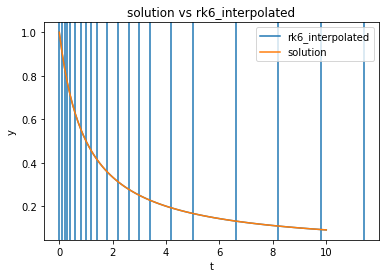

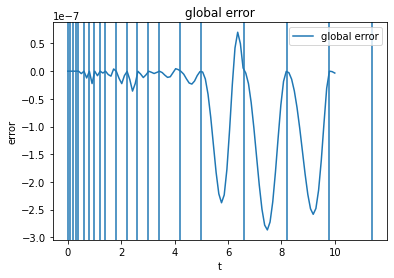

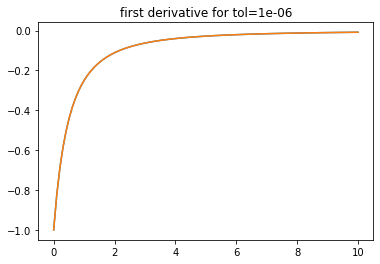

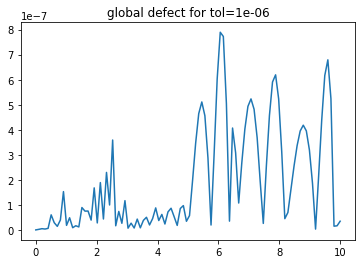

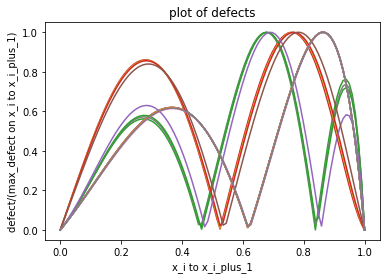

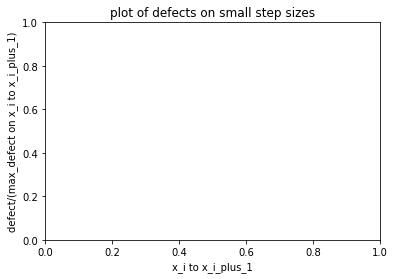

0.0
0.0
0.0
5.895284260759581e-14
8.08242361927114e-14
4.9182879990894435e-14
1.1446399383885364e-13
1.3589129821411916e-13
1.315059172668498e-13
1.3616885397027545e-13
1.1407541578023483e-13
1.5792922525292852e-13
1.9551027463649007e-13
1.9917401061775308e-13
2.01200167637694e-13
2.314537450587295e-13
2.1854740239746206e-13
2.1313506515241443e-13
2.060157600070056e-13
1.8832158055204218e-13
1.7655321649101552e-13


In [10]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000003, 2.000000000000001, 0.4999999999999997, 1.0000000000000007, 1.9999999999999978, 0.5000000000000006, 2.0, 0.9999999999999989]
beta values [0.9999999999999996, 1.0000000000000002, 2.0000000000000004, 0.4999999999999998, 1.999999999999999, 1.0, 2.0000000000000013, 0.9999999999999994, 0.5000000000000006, 1.9999999999999978, 1.000000000000001, 0.5, 2.0]
n_steps 23
n_successful_steps 20


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 0.9999999999999998, 1.0000000000000007, 4.000000000000002, 1.9999999999999978, 2.000000000000002, 0.9999999999999989, 2.0000000000000036, 3.9999999999999956, 2.0, 1.0, 2.000000000000009, 1.9999999999999911, 3.9999999999999822]
beta values [0.9999999999999994, 1.999999999999999, 2.0000000000000013, 3.9999999999999996, 3.9999999999999956, 4.000000000000001, 2.0, 1.9999999999999978, 2.000000000000002, 4.0

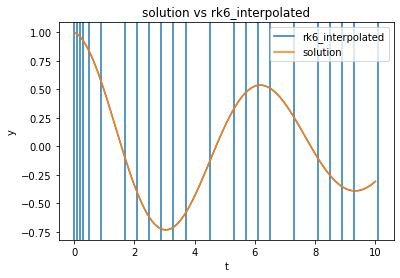

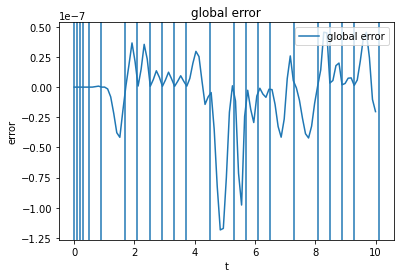

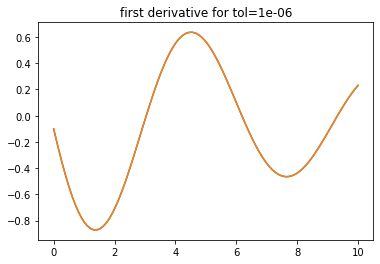

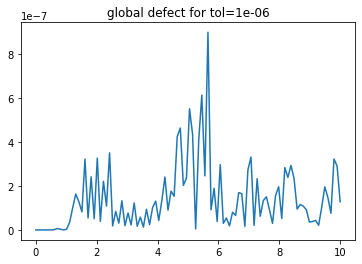

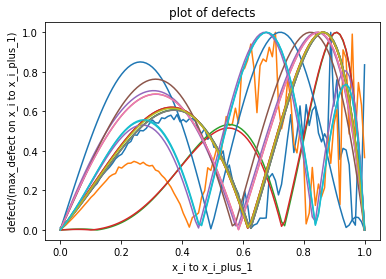

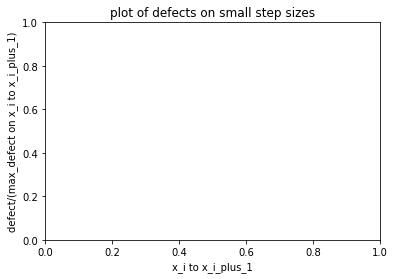

0.0
0.0
0.0
1.3322676295501878e-15
4.218847493575595e-14
1.1174949854364513e-11
5.351862425451159e-10
5.073871878202851e-10
4.764690864078602e-10
4.44572267888077e-10
4.139842912920244e-10
3.866560405185737e-10
1.0127792493541676e-09
4.858563551479733e-11
3.83044707064073e-11
2.708244739579868e-11
1.6558310278469435e-11
1.6358402965543917e-09
1.5429553190671186e-09
1.4780481838450044e-09
1.4137340187403424e-09
1.3511305962943254e-09
3.219009503396819e-10


In [11]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 2.0000000000000013, 0.4999999999999997, 0.5000000000000003, 1.9999999999999978, 1.0000000000000022, 0.9999999999999978, 0.5, 0.5000000000000006]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 2.0, 1.999999999999999, 1.0, 2.0000000000000013, 0.4999999999999997, 0.5000000000000006, 0.9999999999999978, 1.0000000000000022, 1.9999999999999978]
n_steps 37
n_successful_steps 32


Monitor10
alpha values [0.9999999999999989, 1.9999999999999984, 2.0000000000000004, 2.0, 1.0000000000000007, 4.000000000000007, 3.9999999999999956, 2.000000000000009, 1.9999999999999867, 1.9999999999999911, 1.0, 1.0000000000000022, 1.9999999999999978, 2.000000000000002, 1.000000000000001]
beta values [0.9999999999999989, 1.9999999999999978, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 4.0, 4.000000000000003, 2.000000000000002, 1.0000000000000022, 1.9999999999999956, 2.000000000000009, 1.9999999999999911, 4.00

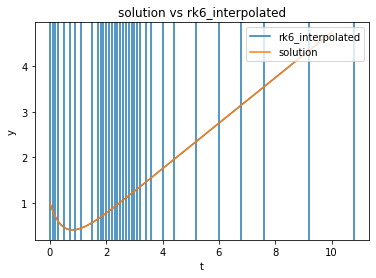

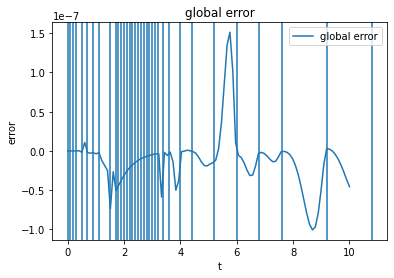

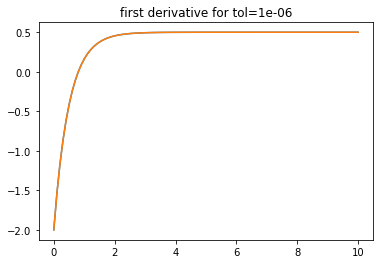

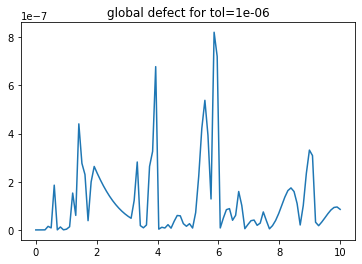

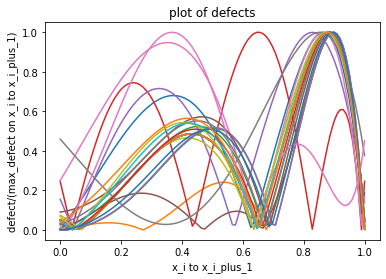

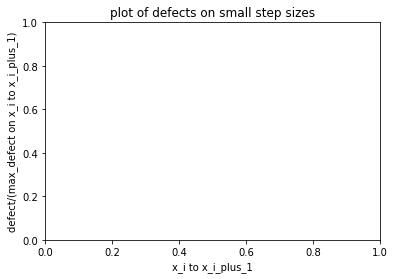

0.0
0.0
0.0
7.473466290264241e-12
1.7136031482678504e-09
2.2939325439175207e-09
2.305270641045354e-09
2.0597263894472917e-09
7.705125193435691e-08
5.18038221208883e-08
4.241367734802992e-08
3.472564713558057e-08
2.8431192178324238e-08
2.3277578975466895e-08
1.9058226885526608e-08
1.560362439256835e-08
1.2775236535311763e-08
1.0459519694805408e-08
8.563516340487354e-09
7.011226266229187e-09
5.74027958499812e-09
4.699687305986799e-09
3.847679064250542e-09
3.1501519170973324e-09
2.579022995163882e-09
1.7334405022495503e-09
1.1653213949358587e-09
1.0355711843601512e-09
6.953631004336103e-10
1.4307158568982459e-08
5.746376263715547e-09
1.7332970614347687e-09
4.594395974777399e-10
3.37521388615869e-09
3.3011282596362435e-10


In [12]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [ ]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)